# Custom Data Fit

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from scipy.interpolate import CubicSpline

from drdmannturb.calibration import CalibrationProblem
from drdmannturb.shared.common import MannEddyLifetime
from drdmannturb.data_generator import OnePointSpectraDataGenerator

from drdmannturb.shared.enums import EddyLifetimeType, PowerSpectraType, DataType
from drdmannturb.shared.parameters import NNParameters, ProblemParameters, LossParameters, PhysicalParameters

device = "cuda" if torch.cuda.is_available() else "cpu" 

# v2: torch.set_default_device('cuda:0')
if torch.cuda.is_available():
    torch.set_default_tensor_type("torch.cuda.FloatTensor")

plt.style.use("bmh")

plt.rc("text", usetex=True)
plt.rc("font", family="serif")

In [3]:
spectra_file = "data/Spectra_interp.dat"


domain = torch.logspace(-1, 2, 20)

L = 70
GAMMA = 3.7
SIGMA = 0.04

Uref = 21
zref = 1

pb = CalibrationProblem(
    nn_params = NNParameters(
        activations = [nn.GELU(), nn.GELU()]
    ),
    prob_params = ProblemParameters(
        data_type = DataType.CUSTOM,
        tol=1e-9,
        nepochs=5
    ),
    loss_params = LossParameters(
        alpha_reg = 1e-5
    ),
    phys_params = PhysicalParameters(
        L=L,
        Gamma=GAMMA,
        sigma=SIGMA,
        domain=domain,
        Uref=Uref,
        zref=zref,
    ),
    device=device
)

/home/ai/miniconda3/envs/fracturbulence/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [4]:
parameters = pb.parameters
parameters[:3] = [np.log(L), np.log(GAMMA), np.log(SIGMA)]
pb.parameters = parameters[:len(pb.parameters)]

CustomData = torch.tensor(np.genfromtxt(spectra_file, skip_header=1, delimiter=","))
f = CustomData[:, 0]
k1_data_pts = 2 * torch.pi * f / Uref

In [6]:
DataPoints = [(k1, 1) for k1 in k1_data_pts]
Data = OnePointSpectraDataGenerator(
    data_points=DataPoints, k1_data_points=k1_data_pts.data.cpu().numpy(),
).Data


In [7]:
pb.calibrate(data=Data)


Calibrating MannNet...
torch.Size([156])
Initial loss:  94.76857420240009

[Calibration.py -- calibrate]-> Epoch 0

loss  =  94.76857420240009
loss  =  92.69704415963663
loss  =  75.28890770792272
loss  =  63.57797354064034
loss  =  5.191571282005228
loss  =  4.593856763032711
loss  =  1.2252038593296393
loss  =  1.1235154426406577
loss  =  0.5289983619890137
loss  =  0.48403172947121154
loss  =  0.1934549911972635
loss  =  0.16792212906358844
loss  =  0.14710985807274982
loss  =  0.06284061081667948
loss  =  0.0620716989298357
loss  =  0.05644098060354397
loss  =  0.05513049355864093
loss  =  0.04847908569914127
loss  =  0.048143275389856494
loss  =  0.04802393024520434
loss  =  0.047495182632923856
loss  =  0.047487629614659785
loss  =  0.047420486322490414
loss  =  0.047107797402687675
loss  =  0.04669909997983895
loss  =  0.04505559674093021
---------------------------------



[Calibration.py -- calibrate]-> Epoch 1

loss  =  0.04505559674093021


/home/ai/miniconda3/envs/fracturbulence/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:163: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


loss  =  0.04487687779352707
loss  =  0.04376548915069607
loss  =  0.04359066200363243
loss  =  0.04294634359988267
loss  =  0.04281606550655817
loss  =  0.04237078432234107
loss  =  0.04230759723444406
loss  =  0.042009398481574534
loss  =  0.0419760461046648
loss  =  0.04194825402010856
loss  =  0.04184734800939624
loss  =  0.04180554653631619
loss  =  0.04159070184620937
loss  =  0.04151971112124819
loss  =  0.041157391886969125
loss  =  0.04099480834647254
loss  =  0.03921913915302483
loss  =  0.19084435313697173
loss  =  0.03778917925321709
loss  =  0.036835927418754466
loss  =  0.03671768088020294
loss  =  0.03655687155069096
loss  =  0.03594037858624958
loss  =  0.035647305057267896
loss  =  0.03429442264173579
---------------------------------



[Calibration.py -- calibrate]-> Epoch 2

loss  =  0.03429442264173579
loss  =  0.03417279066122732
loss  =  0.03330872019078287
loss  =  0.033022215225402524
loss  =  0.031953466193084507
loss  =  0.031236845980940554
loss  =  0.030182

array([-3.35674660e-01,  1.70979849e+00,  1.00929051e+00, -8.03571093e-02,
        9.26725118e-01,  9.82449388e-01,  1.25700890e-01,  1.09714992e+00,
       -1.18000522e+00, -4.32676805e-02, -3.91451972e-01,  7.22718481e-01,
        1.44074191e+00,  8.96704851e-02, -7.16584890e-01,  8.20173474e-02,
        2.03963112e-01, -2.12206207e+00,  2.13971051e+00, -1.78158962e+00,
       -1.53615790e-01,  1.04000275e+00, -3.22291083e-01, -1.99638816e-01,
        2.85420725e-01,  1.19110242e+00, -1.49464968e+00,  1.36587049e+00,
       -1.14870245e+00,  4.96534118e-01,  4.32902361e-01,  5.44017896e-01,
        7.63955579e-01, -6.66664511e-01,  5.67671666e-01, -6.71667838e-01,
        5.29851190e-01, -3.74375850e-02,  1.60527226e-01,  3.47162256e-01,
        5.49649539e-01, -3.29654495e-02, -3.96596958e-01, -9.84538908e-01,
        2.31849631e-01,  4.54232220e-01,  3.83278451e-01, -9.25320782e-02,
        1.52548757e+00,  6.14527601e-01,  9.03171651e-02,  9.00036107e-01,
       -2.36882298e-01, -

k1.size: torch.Size([39])   self.kF_data_vals: torch.Size([156])


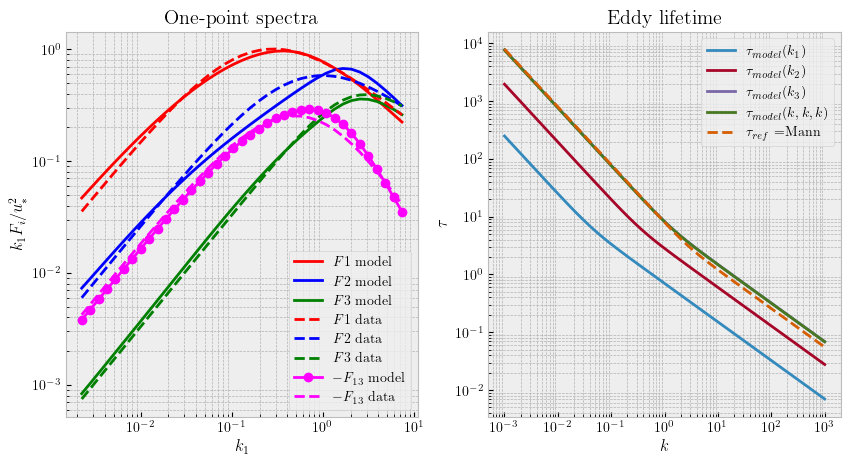

In [8]:
pb.plot(plt_dynamic=False)

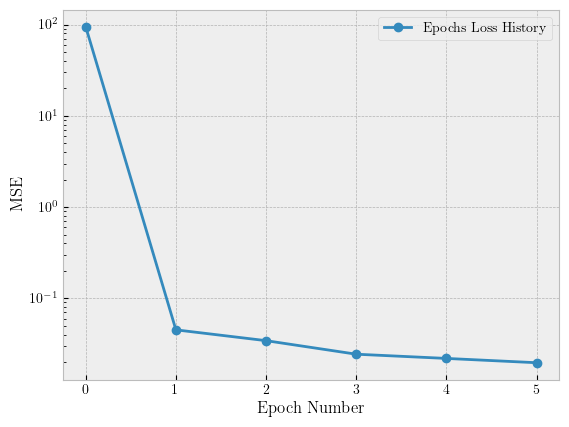

In [9]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot( pb.loss_history_epochs, 'o-', label="Epochs Loss History")
plt.legend()
plt.xlabel("Epoch Number")
plt.ylabel("MSE")
plt.yscale('log')

plt.show()
